<a href="https://colab.research.google.com/github/estistern/Capstone/blob/main/Treatment_Costs_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install xgboost
import xgboost as xg

from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the data
cancer_data = pd.read_csv('global_cancer_patients_2015_2024.csv')

In [ ]:
# Encode Gender
cancer_data['Gender'] = cancer_data['Gender'].replace({'Other':2, 'Male':1, 'Female':0})

/tmp/ipython-input-4-2577140762.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_data['Gender'] = cancer_data['Gender'].replace({'Other':2, 'Male':1, 'Female':0})


In [ ]:
# Encode Cancer Stage
cancer_data['Cancer_Stage'] = cancer_data['Cancer_Stage'].replace({'Stage 0':0, 'Stage I':1, 'Stage II':2, 'Stage III':3, 'Stage IV':4})

/tmp/ipython-input-5-2326103387.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_data['Cancer_Stage'] = cancer_data['Cancer_Stage'].replace({'Stage 0':0, 'Stage I':1, 'Stage II':2, 'Stage III':3, 'Stage IV':4})


In [ ]:
# One Hot encode Country/Region, Cancer Type
cancer_data = pd.get_dummies(cancer_data, columns=['Country_Region', 'Cancer_Type'])

In [ ]:
# Splitting into features and target variable
X = cancer_data.drop(['Treatment_Cost_USD', 'Patient_ID'], axis=1)
y = cancer_data['Treatment_Cost_USD']

In [ ]:
# Splitting into training - 75% and testing - 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [ ]:
# Random Forest Regressor
# Using all the features
rf1 = RandomForestRegressor(random_state=23)
rf1.fit(X_train, y_train)

RandomForestRegressor(random_state=23)

In [ ]:
# Test the model on X_test
y_pred_rf1 = rf1.predict(X_test)

In [ ]:
# Accuracy metrics
mse_rf1 = mean_squared_error(y_test, y_pred_rf1)
mae_rf1 = mean_absolute_error(y_test, y_pred_rf1)
rmse_rf1 = np.sqrt(mse_rf1)
r2_rf1 = r2_score(y_test, y_pred_rf1)
print('MSE:', mse_rf1)
print('MAE:', mae_rf1)
print('RMSE:', rmse_rf1)
print('R2:', r2_rf1)

MSE: 82778592.60447659
MAE: 7438.889650951999
RMSE: 9098.27415527124
R2: 0.8900421379072706


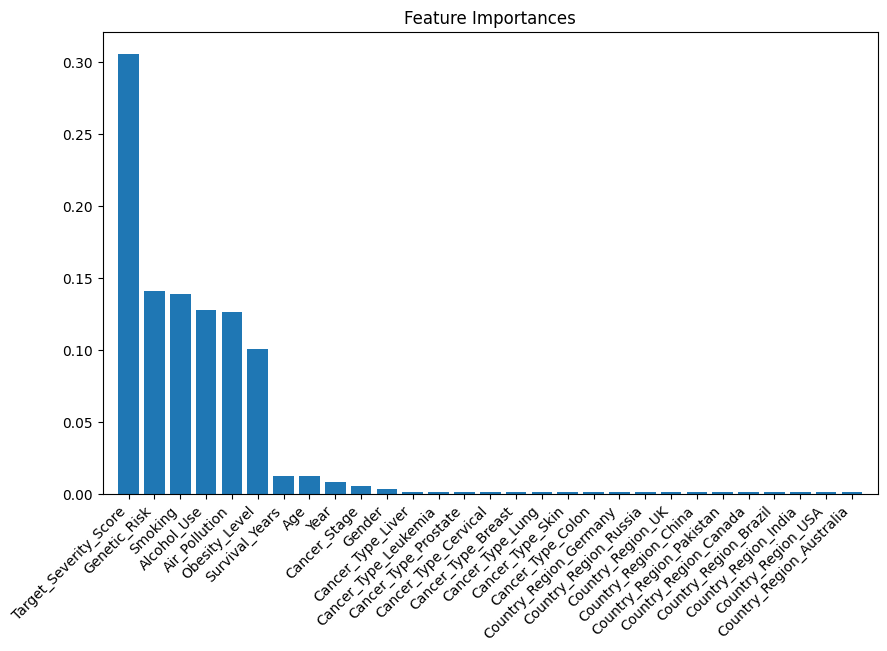

In [ ]:
# Feature Importance
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha='right')
plt.xlim([-1, len(features)])
plt.show()

In [ ]:
# Remove columns with very little importance
to_drop = ['Cancer_Type_Colon','Cancer_Type_Leukemia','Cancer_Type_Lung', 'Cancer_Type_Cervical', 'Cancer_Type_Liver', 'Cancer_Type_Breast', 'Cancer_Type_Skin', 'Cancer_Type_Prostate',
           'Country_Region_UK', 'Country_Region_Russia', 'Country_Region_China', 'Country_Region_USA', 'Country_Region_Germany', 'Country_Region_Australia', 'Country_Region_Canada', 'Country_Region_Brazil', 'Country_Region_Pakistan', 'Country_Region_India']
X2 = cancer_data.drop(['Treatment_Cost_USD', 'Patient_ID'] + to_drop, axis=1)

In [ ]:
# Split into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.25, random_state=23)

In [ ]:
# Random Forest Regressor
# With less features
rf2 = RandomForestRegressor(random_state=23)
rf2.fit(X_train2, y_train2)

RandomForestRegressor(random_state=23)

In [ ]:
# Test the model on X_test
y_pred_rf2 = rf2.predict(X_test2)

In [ ]:
# Accuracy metrics
mse_rf2 = mean_squared_error(y_test2, y_pred_rf2)
mae_rf2 = mean_absolute_error(y_test2, y_pred_rf2)
rmse_rf2 = np.sqrt(mse_rf2)
r2_rf2 = r2_score(y_test2, y_pred_rf2)
print('MSE:', mse_rf2)
print('MAE:', mae_rf2)
print('RMSE:', rmse_rf2)
print('R2:', r2_rf2)

MSE: 80033645.19954082
MAE: 7304.561677632
RMSE: 8946.152536120811
R2: 0.8936883529334898


In [ ]:
# XGBoost
# With all features
xgb1 = xg.XGBRegressor(objective='reg:squarederror', seed=23)
xgb1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Test the model on X_test
y_pred_xgb1 = xgb1.predict(X_test)

In [ ]:
# Metrics
rmse_xgb1 = np.sqrt(mean_squared_error(y_test, y_pred_xgb1))
r2_xgb1 = r2_score(y_test, y_pred_xgb1)
print('RMSE:', rmse_xgb1)
print('R2:', r2_xgb1)

RMSE: 5042.690719554216
R2: 0.9662220791051046


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

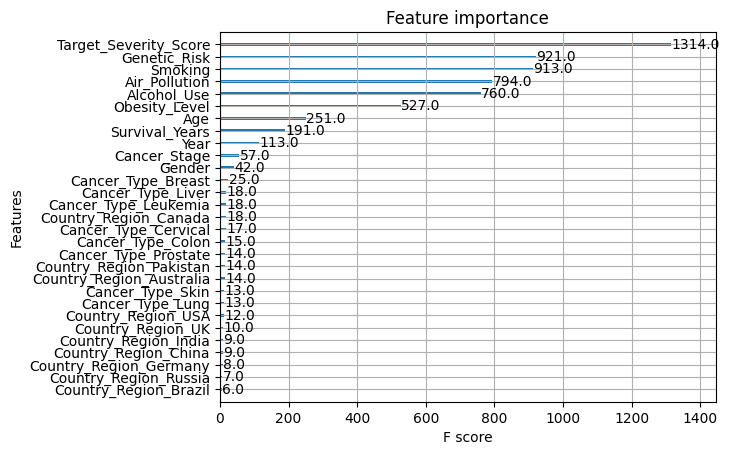

In [ ]:
# Feature Importance
plot_importance(xgb1)

In [ ]:
# XGBoost
# With less features
xgb2 = xg.XGBRegressor(objective='reg:squarederror', seed=23)
xgb2.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Test the model on X_test
y_pred_xgb2 = xgb2.predict(X_test2)

In [ ]:
# Metrics
rmse_xgb2 = np.sqrt(mean_squared_error(y_test2, y_pred_xgb2))
r2_xgb2 = r2_score(y_test2, y_pred_xgb2)
print('RMSE:', rmse_xgb2)
print('R2:', r2_xgb2)

RMSE: 5051.359034992242
R2: 0.9661058517387933


In [ ]:
# Randomized Search Cross Validation
# Random Forest Regressor
param_distributions = {
    'n_estimators': [i for i in range(5, 101)],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 3, 5]
}

rscv = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', random_state=23)
rscv.fit(X_train2, y_train2)

print(f'selected_params: {rscv.best_params_},',
      f'train accuracy: {rscv.score(X_train2, y_train2):.4f},',
      f' test accuracy: {rscv.score(X_test2, y_test2):.4f}')

selected_params: {'n_estimators': 52, 'min_samples_leaf': 3, 'max_depth': 5}, train accuracy: 0.4217,  test accuracy: 0.4136


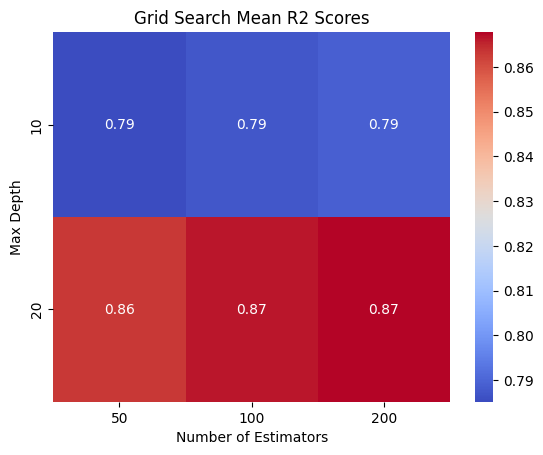

In [ ]:
# Grid Search
# Random Forest Regressor
# Default values: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=23), param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train2, y_train2)

results = pd.DataFrame(grid_search.cv_results_)

pivot_table = results.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_n_estimators'
)

sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Grid Search Mean R2 Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

In [ ]:
# Best parameters from grid search
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Random Forest with best parameters from grid search
rf4 = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=None, min_samples_leaf=1, random_state=23)
rf4.fit(X_train2, y_train2)

RandomForestRegressor(n_estimators=200, random_state=23)

In [ ]:
# Test the model on X_test
y_pred_rf4 = rf4.predict(X_test2)

In [ ]:
# Accuracy metrics
mse_rf4 = mean_squared_error(y_test2, y_pred_rf4)
mae_rf4 = mean_absolute_error(y_test2, y_pred_rf4)
rmse_rf4 = np.sqrt(mse_rf4)
r2_rf4 = r2_score(y_test2, y_pred_rf4)
print('MSE:', mse_rf4)
print('MAE:', mae_rf4)
print('RMSE:', rmse_rf4)
print('R2:', r2_rf4)

MSE: 78552477.34062521
MAE: 7235.518864732001
RMSE: 8862.983546223315
R2: 0.8956558429093706


In [ ]:
# Grid Search XGBoost
# Default values: max_depth=6, learning_rate=0.3, n_estimators=100

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

xgb_grid_search = GridSearchCV(estimator=xg.XGBRegressor(objective='reg:squarederror', seed=23), param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
xgb_grid_search.fit(X_train2, y_train2)

print(xgb_grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
# XGBoost with parameters from grid search
xgb3 = xg.XGBRegressor(objective='reg:squarederror', seed=23, max_depth=3, learning_rate=0.2, n_estimators=300)
xgb3.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Test the model on X_test
y_pred_xgb3 = xgb3.predict(X_test2)

In [ ]:
# Metrics
rmse_xgb3 = np.sqrt(mean_squared_error(y_test2, y_pred_xgb3))
r2_xgb3 = r2_score(y_test2, y_pred_xgb3)
print('RMSE:', rmse_xgb3)
print('R2:', r2_xgb3)

RMSE: 3156.177127013693
R2: 0.9867678326365661


In [ ]:
!pip install lazypredict scikit-learn pandas
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=mean_squared_error)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.3 MB/s eta 0:00:00


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.3286490447844169, 'Adjusted R-Squared': 0.3270877634932179, 'RMSE': np.float64(22481.261695240097), 'Time taken': 3.907147169113159, 'mean_squared_error': 505407127.4098696}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8650137183745837, 'Adjusted R-Squared': 0.8646997967894083, 'RMSE': np.float64(10080.70005218789), 'Time taken': 4.153000116348267, 'mean_squared_error': 101620513.54218096}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999723891685212, 'Adjusted R-Squared': 0.9999723249572852, 'RMSE': np.float64(144.17355859043957), 'Time taken': 0.07882332801818848, 'mean_squared_error': 20786.01499663091}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6332886709465174, 'Adjusted R-Squared': 0.632435853902207, 'RMSE': np.float64(16615.29433416246), 'Time taken': 0.5286946296691895, 'mean_squared_error': 276068005.81085116}
{'Model': 'DummyRegressor', 'R-Squared': -2.8252380731563775e-05, 'Adjusted R-Squared': -0.0023538994792915435, 'RMSE':

In [ ]:
# Bayesian Ridge
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
from sklearn.linear_model import BayesianRidge
br1 = BayesianRidge()
br1.fit(X_train_scaled, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Standardize X_test
X_test_scaled = scaler.transform(X_test)
# Test on X_test
y_pred_br1 = br1.predict(X_test_scaled)

In [ ]:
# Metrics
rmse_br1 = np.sqrt(mean_squared_error(y_test, y_pred_br1))
r2_br1 = r2_score(y_test, y_pred_br1)
print('RMSE:', rmse_br1)
print('R2:', r2_br1)

RMSE: 144.1255113387782
R2: 0.9999724075686152
